In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
A = imread('mandrill-large.tiff')
print(A.shape)

(512, 512, 3)


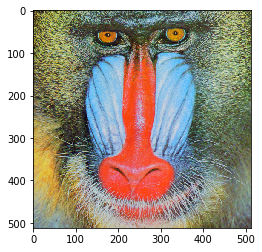

In [3]:
plt.imshow(A)
plt.show()

###################################################################################################################

In [4]:
import numpy as np
import kmeans

In [5]:
A = imread('mandrill-small.tiff')
print(A.shape)

(128, 128, 3)


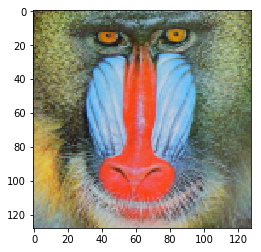

In [6]:
plt.imshow(A)
plt.show()

In [7]:
# Change data type to np.int32, useful for calculations of Euclidean distance in K-means
A = np.array(A, dtype = np.int32)

# Reshape an image 3D array of shape (n1, n2, d) into a 2D array of shape (n1*n2, d)
n1 = A.shape[0]
n2 = A.shape[1]
d = A.shape[2]
nPixel = n1 * n2
newA = A.reshape(nPixel, d)

In [8]:
# Number of centroids
K = 16

# Initialize the centroids 
np.random.seed(229)
initialCentroidsIndices = np.random.choice(range(nPixel), size = K, replace = False)
initialCentroids = newA[initialCentroidsIndices, :]

In [9]:
idx, centroids = kmeans.K_means(data = newA, centroids = initialCentroids, K = 16, nIteration = 100)

It is not required, but let's visualize the centroids in the following ways.

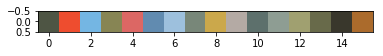

In [10]:
plt.imshow(np.array(centroids, dtype = np.uint8)[np.newaxis, :, :])
plt.show()

These are the 16 colors corresponding to the 16 centroids.

In the following, I just do the same thing in part (c), but on this smaller image.

In [11]:
img = np.zeros(newA.shape)
for k in range(K):
    img[idx == k] = centroids[k, :]
imgCompressed = img.reshape(A.shape)
imgCompressed = np.array(imgCompressed, dtype = np.uint8)

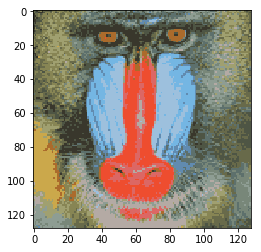

In [12]:
plt.imshow(imgCompressed)
plt.show()

###################################################################################################################

In [13]:
A = imread('mandrill-large.tiff')
A = np.array(A, dtype = np.int32)

# Reshape an image 3D array of shape (n1, n2, d) into a 2D array of shape (n1*n2, d)
n1 = A.shape[0]
n2 = A.shape[1]
d = A.shape[2]
nPixel = n1 * n2
newA = A.reshape(nPixel, d)

In [14]:
idx = kmeans.cluster_assignment(data = newA, centroids = centroids)

In [15]:
img = np.zeros(newA.shape)
for k in range(K):
    img[idx == k] = centroids[k, :]
imgCompressed = img.reshape(A.shape)
imgCompressed = np.array(imgCompressed, dtype = np.uint8)

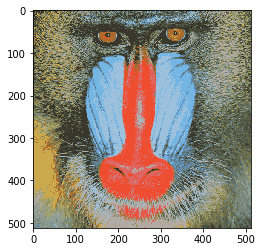

In [16]:
plt.imshow(imgCompressed)
plt.show()

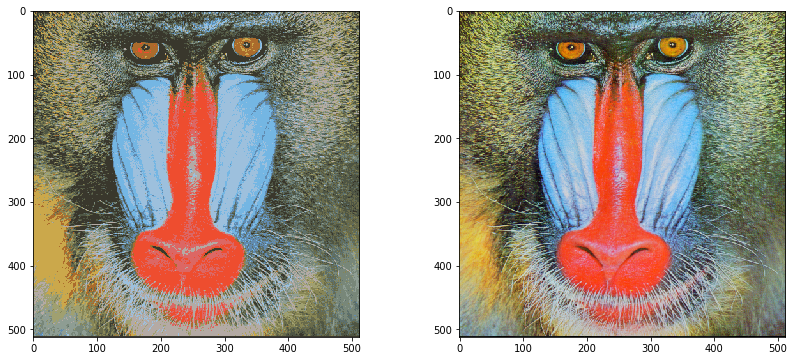

In [17]:
nrow = 1; ncol = 2
fig=plt.figure(figsize=(14, 6))
fig.add_subplot(nrow, ncol, 1)
plt.imshow(imgCompressed)
fig.add_subplot(nrow, ncol, 2)
plt.imshow(A)

Compressed image is on the left while original image is on the right. It is obvious that the compressed image is coarser (especially for the part of eyes).